In [2]:
import numpy as np
import pandas as pd
import os

In [4]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 

In [7]:
collision_train = pd.read_csv('/Users/rakeshmehta/Desktop/AI-Collision-Algo/Data/train_data.csv')
collision_train.info()
collision_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162634 entries, 0 to 162633
Columns: 103 entries, event_id to AP
dtypes: float64(98), int64(4), object(1)
memory usage: 127.8+ MB


,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,...,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,...,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,...,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,...,0.022066,57.993905,0.003298,0.164309,0.002918,0.386400,89.0,83.0,40.0,14.0
4,0,0.257806,5,-10.391260,-7.852942,9.036838,14510.0,13792.0,478.7,5811.1,...,0.015075,57.946717,0.003670,0.164172,0.003220,0.386388,89.0,83.0,40.0,14.0


In [9]:
collision_train = pd.read_csv('/Users/rakeshmehta/Desktop/AI-Collision-Algo/Data/train_data.csv')

# Extract the first 500 rows
collision_train = collision_train.head(500)

# Display information about the subset DataFrame
collision_train.info()

# Display the first few rows of the subset DataFrame
collision_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 103 entries, event_id to AP
dtypes: float64(98), int64(4), object(1)
memory usage: 402.5+ KB


,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,...,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,...,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,...,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,...,0.022066,57.993905,0.003298,0.164309,0.002918,0.386400,89.0,83.0,40.0,14.0
4,0,0.257806,5,-10.391260,-7.852942,9.036838,14510.0,13792.0,478.7,5811.1,...,0.015075,57.946717,0.003670,0.164172,0.003220,0.386388,89.0,83.0,40.0,14.0


Dummy encoding converts a variable that has n possible distinct values, into n-1 binary variables. 

For regression-type problems Dummy Encoding is preferable as we wish to avoid perfect collinearity between the binary variables that are being generated by the encoding. In the classification problem however, we are not concerned about inflating factors and hence can choose either of the two schemes. They will produce equivalent encodings.

By default pd.get_dummies() does one-hot enocoding. To do dummy encoding, you need to pass the parameter drop_first=True.

In [10]:

categorical_columns = collision_train.select_dtypes(include=['object']).columns

print("Categorical columns:")
print(categorical_columns)


Categorical columns:
Index(['c_object_type'], dtype='object')


import pandas as pd
#FIRST MAYBE OPTION

collision_train_copy = collision_train.copy()

#Replace missing values in 'c_object_type' column with the mode of non-NaN values
mode_c_object_type = collision_train_copy['c_object_type'].mode()[0]  # Get the mode value
collision_train_copy['c_object_type'].fillna(mode_c_object_type, inplace=True)

#Creating dummy variables
dummy_columns = pd.get_dummies(collision_train_copy['c_object_type'], prefix='c_object_type')

#Concatenating the original DataFrame with the dummy variables
new_collision_train = pd.concat([collision_train_copy, dummy_columns], axis=1)

#Dropping the original 'c_object_type' column
new_collision_train.drop('c_object_type', axis=1, inplace=True)

#Displaying the new DataFrame
print(new_collision_train)


In [11]:


# Assuming collision_train is your original DataFrame
# Copy the DataFrame to avoid chained assignment issues
collision_train_copy = collision_train.copy()

# Drop rows with any NaN values
collision_train_copy.dropna(inplace=True)

# Replace missing values in 'c_object_type' column with the mode of non-NaN values
mode_c_object_type = collision_train_copy['c_object_type'].mode()[0]  # Get the mode value
collision_train_copy['c_object_type'].fillna(mode_c_object_type, inplace=True)

# Creating dummy variables
dummy_columns = pd.get_dummies(collision_train_copy['c_object_type'], prefix='c_object_type')

# Concatenating the original DataFrame with the dummy variables
new_collision_train = pd.concat([collision_train_copy, dummy_columns], axis=1)

# Dropping the original 'c_object_type' column
new_collision_train.drop('c_object_type', axis=1, inplace=True)

# Displaying the new DataFrame
print(new_collision_train)


     event_id  time_to_tca  mission_id       risk  max_risk_estimate  \
5           1     6.530455           5  -7.561299          -7.254301   
6           1     5.561646           5  -9.315693          -7.468904   
7           1     5.226504           5  -7.422508          -7.051001   
8           1     3.570013           5  -9.248105          -7.327533   
29          3     6.950088          19  -9.568315          -7.057793   
..        ...          ...         ...        ...                ...   
489        34     1.481907           7 -11.735418          -5.502103   
490        34     1.165959           7 -11.844968          -5.481881   
491        34     0.811306           7 -11.801068          -5.486782   
492        34     0.506734           7 -11.855737          -5.480697   
493        34     0.085299           7 -11.818728          -5.478208   

     max_risk_scaling  miss_distance  relative_speed  relative_position_r  \
5            2.746782         2392.0          3434.0      

In [12]:
# Check if there are any NaN values in the DataFrame
nan_values_exist = new_collision_train.isna().any().any()

if not nan_values_exist:
    print("All NaN values have been replaced.")
else:
    print("There are still NaN values in the DataFrame.")


All NaN values have been replaced.


In [13]:
#turn into int
new_collision_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 5 to 493
Columns: 104 entries, event_id to c_object_type_PAYLOAD
dtypes: bool(2), float64(98), int64(4)
memory usage: 201.7 KB


In [14]:
# Check for missing values in the DataFrame new_collision_train
missing_values = new_collision_train.isnull().any()

# Print columns with missing values, if any
if missing_values.any():
    print("Columns with missing values:")
    print(missing_values[missing_values].index.tolist())
else:
    print("No missing values found.")



No missing values found.


In [15]:
# Check for infinite values in the DataFrame new_collision_train
infinite_values = np.isinf(new_collision_train).any()

# Print columns with infinite values, if any
if infinite_values.any():
    print("Columns with infinite values:")
    print(infinite_values[infinite_values].index.tolist())
else:
    print("No infinite values found.")

No infinite values found.


In [16]:
# Compute the range of each numerical feature
feature_ranges = new_collision_train.select_dtypes(include=np.number).apply(lambda x: x.max() - x.min())

# Compute the standard deviation of each numerical feature
feature_std = new_collision_train.select_dtypes(include=np.number).apply(lambda x: x.std())

# Print the range and standard deviation of each numerical feature
print("Range of each numerical feature:")
print(feature_ranges)
print("\nStandard deviation of each numerical feature:")
print(feature_std)


Range of each numerical feature:
event_id                33.000000
time_to_tca              6.944281
mission_id              18.000000
risk                    25.950121
max_risk_estimate        4.794287
                         ...     
c_sigma_ndot         79053.657825
F10                     23.000000
F3M                     23.000000
SSN                     75.000000
AP                      46.000000
Length: 102, dtype: float64

Standard deviation of each numerical feature:
event_id               10.735673
time_to_tca             1.993550
mission_id              6.861289
risk                   10.087540
max_risk_estimate       1.035093
                        ...     
c_sigma_ndot         7056.553696
F10                     5.288206
F3M                     5.682848
SSN                    16.765668
AP                      6.237578
Length: 102, dtype: float64


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
new_collision_train_scaled = scaler.fit_transform(new_collision_train)

# Convert the scaled data back to a DataFrame
new_collision_train_scaled = pd.DataFrame(new_collision_train_scaled, columns=new_collision_train.columns)


In [18]:
X_train = new_collision_train_scaled.drop(columns=['time_to_tca']).values
y_train = new_collision_train_scaled['time_to_tca'].values

In [19]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [20]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor

# Define the chunk size
chunk_size = 6  # Adjust this value according to your memory constraints

# Determine the number of chunks needed
num_chunks = (len(X_train) + chunk_size - 1) // chunk_size  # Ensure the last chunk is not empty

# Split the data into chunks
data_splits = []
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, X_train.shape[0])
    if start_idx < end_idx:  # Check if the chunk is not empty
        X_chunk = X_train[start_idx:end_idx]
        y_chunk = y_train[start_idx:end_idx]
        data_splits.append((X_chunk, y_chunk))

# Initialize the Random Forest regressor
regressor = RandomForestRegressor(warm_start=True, n_estimators=100, max_depth=5)

# Training loop
for _ in range(10):  # 10 passes through the data
    for X, y in tqdm(data_splits, desc="Processing chunks"):  # Add tqdm here
        regressor.fit(X, y)  # Fit the model
        regressor.n_estimators += 1  # Increase the number of estimators

# Train the final model with the entire dataset
regressor.fit(X_train, y_train)


Processing chunks: 100%|███████████████████████| 42/42 [00:00<00:00, 922.44it/s]


RandomForestRegressor(max_depth=5, n_estimators=520, warm_start=True)

from sklearn.ensemble import RandomForestRegressor
# NORMAL ORIGINAL
# Define the chunk size
chunk_size = 10  # Adjust this value according to your memory constraints

# Determine the number of chunks needed
# Determine the number of chunks needed
num_chunks = (len(X_train) + chunk_size - 1) // chunk_size  # Ensure the last chunk is not empty

# Split the data into chunks
data_splits = []
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, X_train.shape[0])
    if start_idx < end_idx:  # Check if the chunk is not empty
        X_chunk = X_train[start_idx:end_idx]
        y_chunk = y_train[start_idx:end_idx]
        data_splits.append((X_chunk, y_chunk))


# Now data_splits is an iterable of (X_chunk, y_chunk) pairs

# Initialize the classifier
regressor = RandomForestRegressor(warm_start=True, n_estimators=1)

# Training loop
for _ in range(10):  # 10 passes through the data
    for X, y in data_splits:
        regressor.fit(X, y)
        regressor.n_estimators += 1




In [21]:
from sklearn.model_selection import cross_val_score

# 10-Fold Cross validation
print(np.mean(cross_val_score(regressor, X_train, y_train, cv=10)))


0.5165698587281027


In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
regressor = RandomForestRegressor()

# Fit the model using the training data
regressor.fit(X_train, y_train)


RandomForestRegressor()

In [23]:
print('The training r_sq is: %.2f'% regressor.score(X_train, y_train))

The training r_sq is: 0.99


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Prediction on the training dataset
ytrain_pred = regressor.predict(X_train)

In [26]:
from sklearn.metrics import precision_score, accuracy_score

# Assuming you have already trained your model and obtained predictions
predictions = regressor.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)


NameError: name 'X_test' is not defined

High R² values on the training set don't necessarily mean that the model will generalize well to unseen data. Overfitting is a concern when R² is very high on the training set but significantly lower on the test set. Therefore, while R² on the training set provides insight into the model's performance on the training data, it's essential to evaluate the model's performance on a separate test set to assess its ability to generalize to new, unseen data.

In [56]:
# The MAE
print( 'The MAE is: %.2f'% mean_absolute_error(y_train, ytrain_pred))


The MAE is: 0.02


MAE of 0.02 suggests that your model has good predictive performance on the training set, as the average error is very small. However, it's important to note that evaluating the model's performance solely on the training set may not provide a complete picture of its effectiveness. It's essential to assess the model's performance on a separate test set to ensure that it generalizes well to unseen data.

If the MAE is also low on the test set, it indicates that the model is likely to perform well in real-world scenarios. However, if there's a significant difference in performance between the training and test sets, it may indicate issues such as overfitting or underfitting, which need to be addressed.

In [57]:
# The MSE

mse = mean_squared_error(y_train, ytrain_pred)
rmse = np.sqrt(mse)

# Print the root mean squared error
print('The MSE is: %.2f' % mse)

print('The RMSE is: %.2f' % rmse)

The MSE is: 0.00
The RMSE is: 0.03


The RMSE (Root Mean Squared Error) of 0.03 represents the square root of the MSE, providing an interpretation of the error in the same units as the target variable. A RMSE of 0.03 suggests that, on average, the model's predictions are off by approximately 0.03 units from the actual values in the training data.

Overall, while a perfect MSE and a low RMSE indicate good performance on the training set, it's crucial to evaluate the model's performance on a separate testing set to ensure it generalizes well to unseen data and to detect any potential issues such as overfitting.

In [58]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_train, ytrain_pred))

The EVS is: 0.99


An Explained Variance Score (EVS) 
In this case, an EVS of 0.99 suggests that the model's predictions are highly accurate and explain almost all of the variance in the target variable.

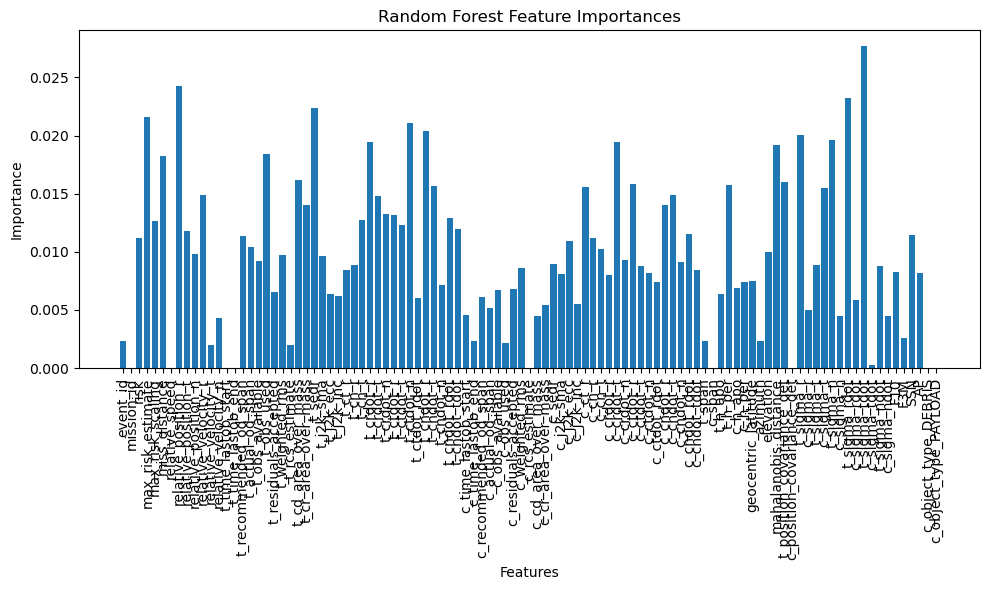

In [59]:
import matplotlib.pyplot as plt

# Initialize the classifier
regressor = RandomForestRegressor(warm_start=True, n_estimators=1)

# Training loop
for _ in range(10):  # 10 passes through the data
    for X, y in data_splits:
        regressor.fit(X, y)
        regressor.n_estimators += 1

# Get feature importances from the trained Random Forest model
feature_importances = regressor.feature_importances_

# Get feature names
feature_names = new_collision_train_scaled.drop(columns=['time_to_tca']).columns

# Plotting feature importances with feature names
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), feature_names, rotation=90)  # Set x-axis labels to feature names
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt

# Initialize the classifier
regressor = RandomForestRegressor(warm_start=True, n_estimators=1)

# Training loop
for _ in range(10):  # 10 passes through the data
    for X, y in data_splits:
        regressor.fit(X, y)
        regressor.n_estimators += 1

# Get feature importances from the trained Random Forest model
feature_importances = regressor.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
#df = pd.DataFrame({ 'event_id': np.random.randint(1,4,100) })

#df = pd.DataFrame({ 'event_id': np.random.randint(1,4,100) })

#pd.concat([df, pd.get_dummies(df['itemID'],prefix = 'itemID_')], axis=1).info()
